In [3]:
import pandas as pd

# Load the data
brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])
gdp_data = pd.read_csv('D:/week10 data/cleaned_gdp_data.csv', parse_dates=['Date'])

# Merge the datasets based on the 'Date' column
merged_data = pd.merge(brent_prices, gdp_data, on='Date', how='left')

# Fill missing GDP values using the forward fill method
merged_data['GDP'].fillna(method='ffill', inplace=True)

# Save the merged data to a CSV file
merged_data.to_csv('D:/week10 data/merged_data.csv', index=False)

# Inspect the merged data
print(merged_data.head())


C:\Users\Robel\AppData\Local\Temp\ipykernel_14324\2200369832.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])
C:\Users\Robel\AppData\Local\Temp\ipykernel_14324\2200369832.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['GDP'].fillna(method='ffill', inplace=True)
C:\Users\Robel\AppData\

        Date  Price Country Name Country Code Indicator Name Indicator Code  \
0 1987-05-20  18.63          NaN          NaN            NaN            NaN   
1 1987-05-21  18.45          NaN          NaN            NaN            NaN   
2 1987-05-22  18.55          NaN          NaN            NaN            NaN   
3 1987-05-25  18.60          NaN          NaN            NaN            NaN   
4 1987-05-26  18.63          NaN          NaN            NaN            NaN   

   GDP  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  


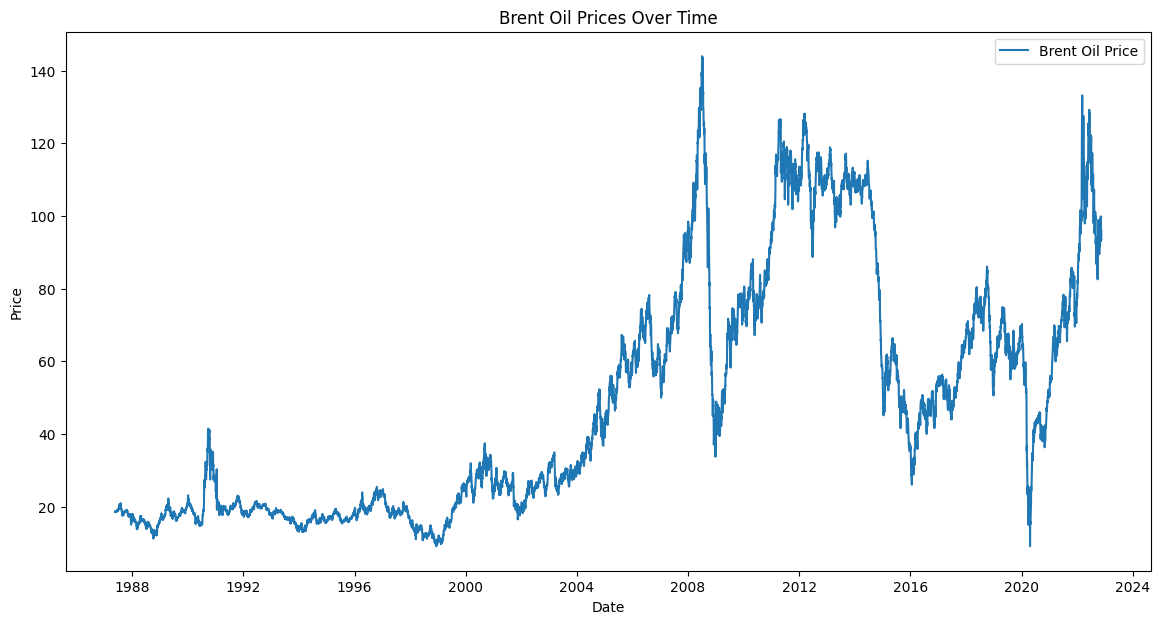

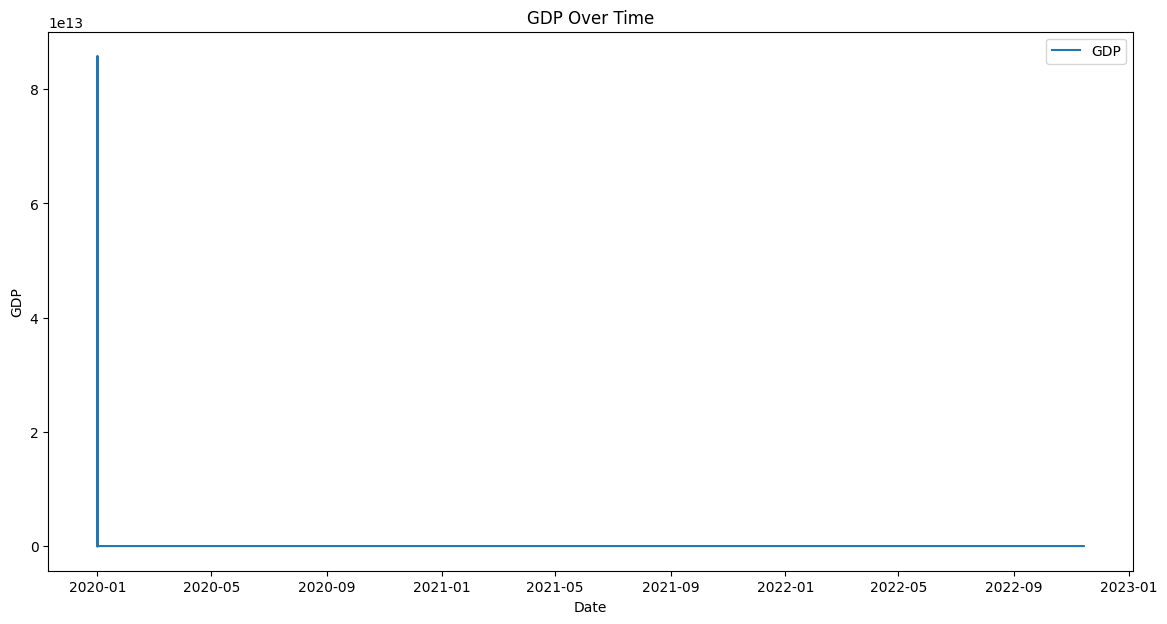

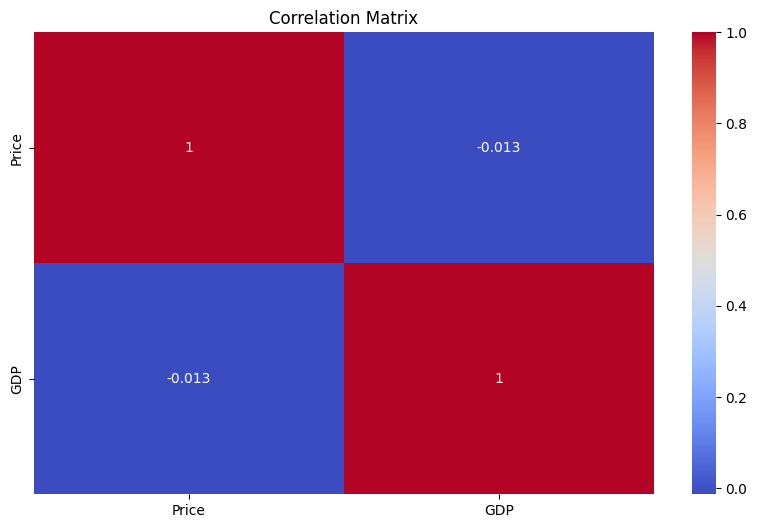

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Brent oil prices over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.show()

# Plot GDP over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['GDP'], label='GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()
plt.show()

# Correlation heatmap
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import pickle

# Load the data
brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])
gdp_data = pd.read_csv('D:/week10 data/cleaned_gdp_data.csv', parse_dates=['Date'])

# Merge the datasets based on the 'Date' column
merged_data = pd.merge(brent_prices, gdp_data, on='Date', how='left')

# Fill missing GDP values using the forward fill method
merged_data['GDP'] = merged_data['GDP'].ffill()

# Fit an ARIMA model
arima_model = ARIMA(merged_data['Price'], order=(5, 1, 0))
arima_results = arima_model.fit()

# Print the model summary
print(arima_results.summary())

# Forecast future values
arima_forecast = arima_results.forecast(steps=30)
print(arima_forecast)

# Save the fitted ARIMA model to a file
with open('D:/week10 data/arima_model2.pkl', 'wb') as file:
    pickle.dump(arima_results, file)


C:\Users\Robel\AppData\Local\Temp\ipykernel_13468\2485101708.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9276
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14833.824
Date:                Tue, 25 Feb 2025   AIC                          29679.649
Time:                        08:59:44   BIC                          29722.459
Sample:                             0   HQIC                         29694.194
                               - 9276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.472      0.000       0.015       0.037
ar.L2         -0.0236      0.005     -4.360      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.542      0.1

In [3]:
# Load the saved ARIMA model
with open('D:/week10 data/arima_model2.pkl', 'rb') as file:
    loaded_arima_model = pickle.load(file)

# Print the summary of the loaded model
print(loaded_arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9276
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14833.824
Date:                Tue, 25 Feb 2025   AIC                          29679.649
Time:                        09:02:14   BIC                          29722.459
Sample:                             0   HQIC                         29694.194
                               - 9276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.472      0.000       0.015       0.037
ar.L2         -0.0236      0.005     -4.360      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.542      0.1

In [6]:
import pandas as pd
from statsmodels.tsa.api import VAR
import pickle

# Load the data
brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])
gdp_data = pd.read_csv('D:/week10 data/cleaned_gdp_data.csv', parse_dates=['Date'])

# Merge the datasets based on the 'Date' column
merged_data = pd.merge(brent_prices, gdp_data, on='Date', how='left')

# Fill missing GDP values using the forward fill method
merged_data['GDP'] = merged_data['GDP'].ffill()

# Prepare the data for VAR
var_data = merged_data[['Price', 'GDP']].dropna()

# Fit a VAR model
var_model = VAR(var_data)
var_results = var_model.fit(maxlags=5)

# Print the model summary
print(var_results.summary())

# Forecast future values
lag_order = var_results.k_ar
var_forecast = var_results.forecast(var_data.values[-lag_order:], steps=30)
print(var_forecast)

# Save the fitted VAR model to a file
with open('D:/week10 data/var_model2.pkl', 'wb') as file:
    pickle.dump(var_results, file)


C:\Users\Robel\AppData\Local\Temp\ipykernel_13468\52636861.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_prices = pd.read_csv('D:/week10 data/brentoilprices.csv', parse_dates=['Date'])


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Feb, 2025
Time:                     09:05:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    59.9188
Nobs:                     989.000    HQIC:                   59.8513
Log likelihood:          -32360.6    FPE:                9.44244e+25
AIC:                      59.8098    Det(Omega_mle):     9.23585e+25
--------------------------------------------------------------------
Results for equation Price
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.243097         0.198650            1.224           0.221
L1.Price         1.017074         0.031964           31.820           0.000
L1.GDP          -0.000000         0.000000           -0.070           0.944
L2.P

c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [7]:
# Load the saved VAR model
with open('D:/week10 data/var_model2.pkl', 'rb') as file:
    loaded_var_model = pickle.load(file)

# Print the summary of the loaded model
print(loaded_var_model.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Feb, 2025
Time:                     09:06:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    59.9188
Nobs:                     989.000    HQIC:                   59.8513
Log likelihood:          -32360.6    FPE:                9.44244e+25
AIC:                      59.8098    Det(Omega_mle):     9.23585e+25
--------------------------------------------------------------------
Results for equation Price
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.243097         0.198650            1.224           0.221
L1.Price         1.017074         0.031964           31.820           0.000
L1.GDP          -0.000000         0.000000           -0.070           0.944
L2.P

In [8]:
import torch
import torch.nn as nn

# Define the device to be used (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Prepare the data for LSTM training
input_size = 1
hidden_size = 50
num_layers = 1
output_size = 1
learning_rate = 0.001

# Prepare the data for training
train_data = torch.FloatTensor(merged_data['Price'].values).view(-1, input_size, 1).to(device)

# Initialize the LSTM model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop (simplified)
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    
    outputs = model(train_data)
    optimizer.zero_grad()
    
    # Calculate loss
    loss = criterion(outputs, train_data.view(-1, output_size))
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation and prediction
model.eval()
with torch.no_grad():
    predicted = model(train_data).cpu().numpy()

# Print predictions
print(predicted)

# Save the LSTM model
model_path = 'D:/week10 data/lstm_model2.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')


Epoch [10/100], Loss: 3443.5710
Epoch [20/100], Loss: 3417.7874
Epoch [30/100], Loss: 3396.9285
Epoch [40/100], Loss: 3376.8022
Epoch [50/100], Loss: 3353.9885
Epoch [60/100], Loss: 3326.6101
Epoch [70/100], Loss: 3286.5015
Epoch [80/100], Loss: 3227.8047
Epoch [90/100], Loss: 3157.2578
Epoch [100/100], Loss: 3098.5142
[[3.2472868]
 [3.2386625]
 [3.2434719]
 ...
 [4.040274 ]
 [4.0440316]
 [4.039052 ]]
Model saved to D:/week10 data/lstm_model2.pth


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate ARIMA model
arima_pred = arima_results.forecast(steps=len(merged_data))
arima_mse = mean_squared_error(merged_data['Price'], arima_pred)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(merged_data['Price'], arima_pred)
arima_r2 = r2_score(merged_data['Price'], arima_pred)
print(f'ARIMA RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, R-squared: {arima_r2:.4f}')


ARIMA RMSE: 55.1361, MAE: 49.0576, R-squared: -1.8700


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Align the length of var_pred with var_data['Price']
var_pred = var_results.fittedvalues['Price']
actual_prices = var_data['Price'][var_results.k_ar:].reset_index(drop=True)  # Adjust to account for the lag

# Align var_pred to match actual_prices length
var_pred = var_pred.reset_index(drop=True)

# Ensure the lengths match
actual_prices = actual_prices.iloc[:len(var_pred)]

# Calculate evaluation metrics for VAR
var_mse = mean_squared_error(actual_prices, var_pred)
var_rmse = np.sqrt(var_mse)
var_mae = mean_absolute_error(actual_prices, var_pred)
var_r2 = r2_score(actual_prices, var_pred)

print(f'VAR RMSE: {var_rmse:.4f}, MAE: {var_mae:.4f}, R-squared: {var_r2:.4f}')


VAR RMSE: 1.9397, MAE: 1.1135, R-squared: 0.9930


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch

# Set the model to evaluation mode
model.eval()

# Make predictions using the trained LSTM model
with torch.no_grad():
    predicted = model(train_data).cpu().numpy()

# Convert the actual data to numpy
actual = train_data.cpu().numpy().reshape(-1, 1)

# Calculate evaluation metrics
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)

print(f'LSTM RMSE: {rmse:.4f}')
print(f'LSTM MAE: {mae:.4f}')
print(f'LSTM R-squared: {r2:.4f}')


LSTM RMSE: 55.6175
LSTM MAE: 45.3393
LSTM R-squared: -1.9204
